# Test things on the real data 

In [1]:
# import relevant packages 
from src.data.preprocess_utils import read_ns5_file, filter 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import pickle 
import glob 

sns.set_theme()

rcParams = {
    "font.family": "serif",  # use serif/main font for text elements
    'text.usetex': True,
    'font.size': 8,
    'axes.labelsize': 7,
    'axes.titlesize': 9,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 7,
    'axes.labelpad': 1,
    'axes.axisbelow': True,  # draw gridlines below other elements
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        r"\usepackage{url}",            # load additional packages
        r"\usepackage{amsmath,amssymb}",   # unicode math setup
        #  r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
}
plt.rcParams.update(rcParams)

figdir = "../../../figures/results/"
def savefig(fig, name, width=6, height=4):
    # apply rcParams
    fig.set_size_inches(width, height)
    fig.savefig(figdir + name + ".pdf", bbox_inches='tight')

Original ACF : 0.4979223793280473
new acf :  0.04620897210415848
ratio : 0.09280356542021287


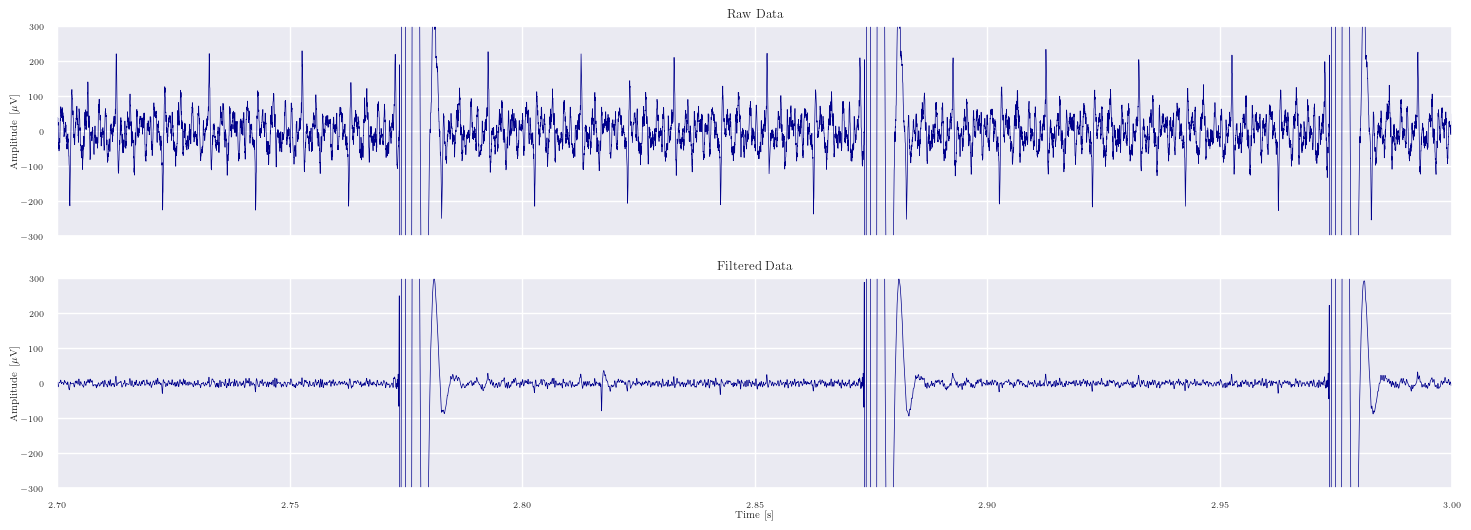

In [2]:
path = "../../data/raw/Ramp data/Eye 5/ramp_file7.ns5"
times, data = read_ns5_file(path)
filtered_data, _ = filter(data, threshold=0.65)
channel = 31

fig, ax = plt.subplots(2, 1, figsize=(18, 6), sharex=True)
ax[0].plot(times, data[:, channel], color = "darkblue", linewidth = 0.5)
ax[0].set_title("Raw Data")

ax[1].plot(times, filtered_data[:, channel], color = "darkblue", linewidth = 0.5)  
ax[1].set_title("Filtered Data")

ax[1].set_xlabel("Time [s]")    
[a.set_ylabel(r"Amplitude [$\mu$V]") for a in ax]
[a.set_ylim([-300, 300]) for a in ax]
[a.set_xlim([2.7, 3]) for a in ax]
plt.show()

savefig(fig, "real_data_ramp7", width = 6.5, height = 3.2)

### Read results from HPC

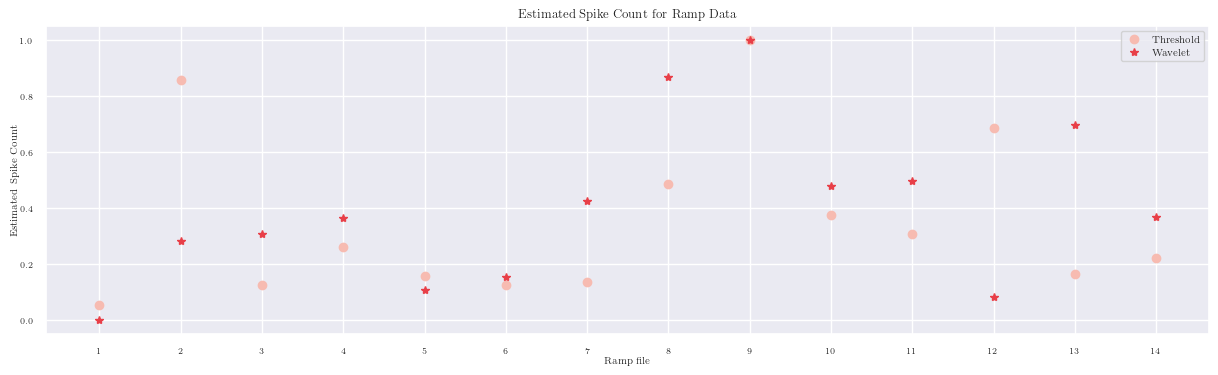

In [7]:
def get_metrics(files : str, to_glob = True) -> tuple[np.ndarray, np.ndarray, np.ndarray]: 
    if to_glob: 
        files = glob.glob(files + "/*.pkl")

    baseline_results = np.zeros(len(files))
    wavelet_results = np.zeros(len(files))
    svm_results = np.zeros(len(files))

    for i, f in enumerate(files): 
        with open(f, "rb") as g:
            ramp = pickle.load(g)
        g.close()

        baseline_results[i] = np.sum(ramp['estimated_baseline'])
        wavelet_results[i] = np.sum(ramp['estimated_wavelet'])
        svm_results[i] = np.sum(ramp['estimated_svm'])

    return baseline_results, wavelet_results, svm_results

baseline, wavelet, _ = get_metrics("../../results/results_real_stim")
baseline1, wavelet1, _ = get_metrics((["../../results/results_real_spon/eye4_ramp1.pkl"]), to_glob=False)
baseline12, wavelet12, _ = get_metrics(["../../results/results_real_spon/eye4_ramp12.pkl"], to_glob=False)
baseline_tmp = np.r_[baseline1, baseline12, baseline]
wavelet_tmp = np.r_[wavelet1, wavelet12, wavelet]
baseline = baseline / baseline_tmp.max()
wavelet = wavelet / wavelet_tmp.max()

x_axis = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14]

fig = plt.figure(figsize=(15, 4))
plt.plot(x_axis, baseline, 'o', color = np.array([247, 187, 177]) / 255, label = "Threshold")
plt.plot(1, baseline1 / baseline_tmp.max(), 'o', color = np.array([247, 187, 177]) / 255)
plt.plot(12, baseline12 / baseline_tmp.max(), 'o', color = np.array([247, 187, 177]) / 255)
plt.plot(x_axis, wavelet, '*', color = np.array([232, 63, 72]) / 255, label = "Wavelet")
plt.plot(1, wavelet1 / wavelet_tmp.max(), '*', color = np.array([232, 63, 72]) / 255)
plt.plot(12, wavelet12 / wavelet_tmp.max(), '*', color = np.array([232, 63, 72]) / 255)
# plt.plot(x_axis, svr, 's', color = "darkred", label = "SVM")
plt.xticks(np.arange(1, 15))
plt.xlabel("Ramp file")
plt.ylabel("Estimated Spike Count")
plt.title("Estimated Spike Count for Ramp Data")
plt.legend()
plt.show()

savefig(fig, "estimated_spike_real_data_ramp_eye4", width = 6.6, height = 1.8)